In [1]:
# Import all the necessary libraries for the notebook
import matplotlib.pyplot as plt
%matplotlib widget

import pandas as pd
import numpy as np

from skn.query import Query

import sys

from skn import utils
from skn.query import Query
from skn.plotting_service import PlottingService
from skn.simple_plotter import SimplePlotter

from skn.CAN.fields.channels import *
from skn.CAN.tags.tags import *

import numpy as np
import scipy as sp
from scipy import stats as sp_stats
from scipy.optimize import fsolve



ImportError: DLL load failed while importing _dop: The paging file is too small for this operation to complete.

In [ ]:
# Display/Locate logs
Query().all_tags( Car.HERA, Event.ENDURANCE).print_logs()

log_id:      CAN_2024_06_13_192408
car:         Hera
comment:     with driver swap (Håvard first stint, Stian last), 29Nm, 17krpm, 60kW
driver:      1. Håvard, 2. Stian
event:       Endurance
location:    Other
log_name:    Full endurance, 58 laps
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_22_231444
car:         Hera
comment:     20 laps, effect issue
driver:      Håvard Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    i24 endurance
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_28_185443
car:         Hera
comment:     two inverter errors, 60kW, 17krpm, changed kpVx to 12 after a while
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Håvard endurance stint 1
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_28_191404
car:         Hera
comment:     40kW, 14krpm, a lot of problems with force setpoints acting weird on the straights, also no throttle at the end (INS spiking u

Make a Dict from log_id's - Copy last print into log_text.

In [ ]:
import re

log_text = """

log_id:      CAN_2024_06_13_192408
car:         Hera
comment:     with driver swap (Håvard first stint, Stian last), 29Nm, 17krpm, 60kW
driver:      1. Håvard, 2. Stian
event:       Endurance
location:    Other
log_name:    Full endurance, 58 laps
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_22_231444
car:         Hera
comment:     20 laps, effect issue
driver:      Håvard Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    i24 endurance
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_28_185443
car:         Hera
comment:     two inverter errors, 60kW, 17krpm, changed kpVx to 12 after a while
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Håvard endurance stint 1
log_type:    TEST_DRIVE
competition: 



log_id:      CAN_2024_06_28_191956
car:         Hera
comment:     Endurance attempt: stint 1: 60kW, 17krpm, stint 2: 40kW, 14krpm, a lot of problems with force setpoints acting weird on the straights
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Håvard endurance (stint 1, and 2 ish)
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_29_163405
car:         Hera
comment:     60kW, 17krpm, Stopped once because of a cone on the side tray. No INS data.
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Håvard Endurance first stint
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_06_29_170109
car:         Hera
comment:     60kW, 17krpm. Successful endurance, no errors. No INS data.
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Håvard Full Endurance 
log_type:    TEST_DRIVE
competition: 




log_id:      CAN_2024_07_02_173058
car:         Hera
comment:     Loose back wing wire and no brake support
driver:      Stian Lie
event:       Endurance
location:    Lånkebanen
log_name:    Stian second stint endurance
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_07_02_181105
car:         Hera
comment:     Undervoltage, drove 30/35 laps, SoC: 5
driver:      Stian Persson Lie
event:       Endurance
location:    Lånkebanen
log_name:    Stian second stint endurance
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_07_05_200933
car:         Hera
comment:     Håvard first stint, Stian second stint
driver:      Håvard V. Hagerup
event:       Endurance
location:    Lånkebanen
log_name:    Full endurance
log_type:    TEST_DRIVE
competition: 


log_id:      CAN_2024_07_18_122741
car:         Hera
comment:     Håvard first stint and Stian second
driver:      Stian Persson Lie
event:       Endurance
location:    FSN
log_name:    Endurance FSN
log_type:    COMPETITION_DRIVE
competition: FSN






"""  # (Replace with your full output)

logs = {}
current_log_id = None
current_log = {}

for line in log_text.strip().splitlines():
    line = line.strip()
    if not line:
        # Blank line indicates end of one log block
        if current_log_id:
            logs[current_log_id] = current_log
        current_log_id = None
        current_log = {}
    else:
        if line.startswith("log_id:"):
            current_log_id = line.split(":")[1].strip()
        else:
            key, value = line.split(":", 1)
            current_log[key.strip()] = value.strip()

# Catch the last log (if no trailing blank line)
if current_log_id and current_log_id not in logs:
    logs[current_log_id] = current_log

# --- Result ---
print(logs)


{'CAN_2024_06_13_192408': {'car': 'Hera', 'comment': 'with driver swap (Håvard first stint, Stian last), 29Nm, 17krpm, 60kW', 'driver': '1. Håvard, 2. Stian', 'event': 'Endurance', 'location': 'Other', 'log_name': 'Full endurance, 58 laps', 'log_type': 'TEST_DRIVE', 'competition': ''}, 'CAN_2024_06_22_231444': {'car': 'Hera', 'comment': '20 laps, effect issue', 'driver': 'Håvard Hagerup', 'event': 'Endurance', 'location': 'Lånkebanen', 'log_name': 'i24 endurance', 'log_type': 'TEST_DRIVE', 'competition': ''}, 'CAN_2024_06_28_185443': {'car': 'Hera', 'comment': 'two inverter errors, 60kW, 17krpm, changed kpVx to 12 after a while', 'driver': 'Håvard V. Hagerup', 'event': 'Endurance', 'location': 'Lånkebanen', 'log_name': 'Håvard endurance stint 1', 'log_type': 'TEST_DRIVE', 'competition': ''}, 'CAN_2024_06_28_191956': {'car': 'Hera', 'comment': 'Endurance attempt: stint 1: 60kW, 17krpm, stint 2: 40kW, 14krpm, a lot of problems with force setpoints acting weird on the straights', 'driver'

Imports Logs into Dict

In [ ]:
# Validate log IDs and process them
results = {}
invalid_log_ids = []


for log_id in logs.keys():
    if not log_id in Log_id.__members__:
        print(f"Skipping invalid log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
        invalid_log_ids = invalid_log_ids if 'invalid_log_ids' in locals() else []
        invalid_log_ids.append(log_id)
        continue
    results[log_id] = Query().all_tags(getattr(Log_id, log_id)).channels(AMS.TSDATA.CURRENT).channels(AMS.TSDATA.VOLTAGE_TOTAL_SUM_OF_CELLS).execute()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
# Remove invalid log IDs from the logs dictionary
if 'invalid_log_ids' in locals():
    for log_id in invalid_log_ids:
        del logs[log_id]
        print(f"Removed invalid log_id: {log_id}")


Skipping invalid log_id: CAN_2024_06_13_192408 Log_name: Full endurance, 58 laps
Processed log_id: CAN_2024_06_22_231444 Log_name: i24 endurance
Processed log_id: CAN_2024_06_28_185443 Log_name: Håvard endurance stint 1
Processed log_id: CAN_2024_06_28_191956 Log_name: Håvard endurance (stint 1, and 2 ish)
Processed log_id: CAN_2024_06_29_163405 Log_name: Håvard Endurance first stint
Processed log_id: CAN_2024_06_29_170109 Log_name: Håvard Full Endurance
Processed log_id: CAN_2024_07_02_173058 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_02_181105 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_05_200933 Log_name: Full endurance
Processed log_id: CAN_2024_07_18_122741 Log_name: Endurance FSN
Removed invalid log_id: CAN_2024_06_13_192408


In [ ]:
for log_id in logs.keys():
    if log_id not in results:
        print(f"No results for log_id: {log_id}")
        continue
    globals()[f"run_{log_id}"] = results[log_id].to_numpy_arrays()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))

Processed log_id: CAN_2024_06_22_231444 Log_name: i24 endurance
Processed log_id: CAN_2024_06_28_185443 Log_name: Håvard endurance stint 1
Processed log_id: CAN_2024_06_28_191956 Log_name: Håvard endurance (stint 1, and 2 ish)
Processed log_id: CAN_2024_06_29_163405 Log_name: Håvard Endurance first stint
Processed log_id: CAN_2024_06_29_170109 Log_name: Håvard Full Endurance
Processed log_id: CAN_2024_07_02_173058 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_02_181105 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_05_200933 Log_name: Full endurance
Processed log_id: CAN_2024_07_18_122741 Log_name: Endurance FSN


In [ ]:
# names = ['Data_Point','Date_Time','Test_Time','Step_Time','Cycle_Index','Step_Index','TC_Counter1','TC_Counter2','TC_Counter3','TC_Counter4','Current','Voltage','Power','Charge_Capacity','Discharge_Capacity','Charge_Energy','Discharge_Energy','ACR(Ohm)','dV/dt(V/s)','Internal_Resistance(Ohm)','dQ/dV(Ah/V)','dV/dQ(V/Ah)','Aux_Temperature_10(C)','Aux_dT/dt_10(C)','Aux_Temperature_19(C)','Aux_dT/dt_19(C)']



Polynomial coefficients

   Data_Point            Date_Time  Test_Time(s)  Step_Time(s)  Cycle_Index  \
0           1  07/25/2021 22:45:23        11.802         2.501            1   
1           2  07/25/2021 22:45:26        14.301         5.001            1   
2           3  07/25/2021 22:45:28        16.802         7.502            1   
3           4  07/25/2021 22:45:31        19.302        10.001            1   
4           5  07/25/2021 22:45:33        21.801        12.500            1   

   Step_Index  TC_Counter1  TC_Counter2  TC_Counter3  TC_Counter4  ...  \
0           2            0            0            0            0  ...   
1           2            0            0            0            0  ...   
2           2            0            0            0            0  ...   
3           2            0            0            0            0  ...   
4           2            0            0            0            0  ...   

   dV/dt(V/s)  Internal_Resistance(Ohm)  dQ/dV(Ah/V)  dV/dQ(V/Ah)  \
0    0.0000

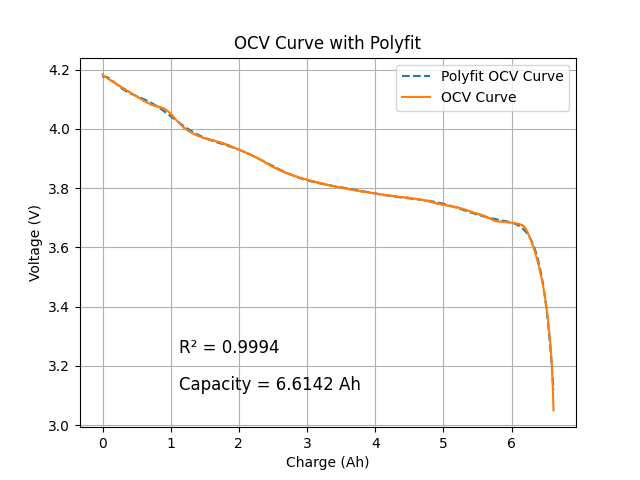

In [ ]:
plt.clf()
ocv = pd.read_csv(
	r"C:\Users\ogodh\Documents\Revolve\Cell data\OCV Curve - Raw Data - r24.csv",
	header=0,
)
print(ocv.head())
num_cells = 144

mask = ((ocv['Current(A)'] < 0) & (ocv['Current(A)'] >-1) )
ocv = ocv[mask].reset_index(drop=True)
Polynomial_coefficients = np.polyfit(ocv['Discharge_Capacity(Ah)'], ocv['Voltage(V)'], 15)
plt.plot(ocv['Discharge_Capacity(Ah)'], np.polyval(Polynomial_coefficients, ocv['Discharge_Capacity(Ah)']), label='Polyfit OCV Curve', linestyle='--')
plt.plot(ocv['Discharge_Capacity(Ah)'], ocv['Voltage(V)'], label='OCV Curve', linestyle='-')
plt.xlabel('Charge (Ah)')
plt.ylabel('Voltage (V)')
plt.title('OCV Curve with Polyfit')
r_value = sp_stats.linregress(ocv['Voltage(V)'], np.polyval(Polynomial_coefficients, ocv['Discharge_Capacity(Ah)'])).rvalue
plt.text(0.2, 0.2, f'R² = {r_value**2:.4f} ', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.2, 0.1, f"Capacity = {ocv['Discharge_Capacity(Ah)'].iloc[-1]} Ah", transform=plt.gca().transAxes, fontsize=12)
capacity = ocv['Discharge_Capacity(Ah)'].iloc[-1]
plt.legend()
plt.grid()
plt.show()
Polynomial_coefficients = np.array([Polynomial_coefficients])





Define functions

In [ ]:
from scipy.integrate import cumtrapz
from scipy.optimize import root_scalar
import numpy as np

def current_to_amperehour(log_id):
    """
    Convert current and time arrays to an array of cumulative charge values (in Ah) at each time step.
    """
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    time = run['time']

    conversion_factor = 1 / 3600  # Convert seconds to hours
    # Cumulative integral of current over time
    charge = cumtrapz(current, x=time, initial=0) * conversion_factor
    return charge





def soc_estimation(log_id):

    """
    Convert charge to voltage using polynomial coefficients.
    """
    def start_charge(log_id):
        """
        Get the starting charge for a given log_id using root finding.
        """
        run = globals()[f"run_{log_id}"]
        voltage = run['TSData_voltage_total_sum_of_cells']
        start_voltage = voltage[0]  # Assuming the first voltage value is the start voltage
        # q = current_to_amperehour(log_id)
        # print('q:', q, type(q))
        # print('Polynomial_coefficients:', Polynomial_coefficients, type(Polynomial_coefficients))
        # print('start_voltage:', start_voltage, type(start_voltage))
        # print( 'type returened' ,type(np.polyval(Polynomial_coefficients[0]*144, q))) 

        def ocv_func(q):         
            return np.polyval(Polynomial_coefficients[0]*num_cells, q) - start_voltage


        
        result = root_scalar(ocv_func, bracket=[0, capacity], method='brentq')
        if result.converged:
            return result.root
        else:
            print("Root finding did not converge.")
            return None
        
        
    start_charge = start_charge(log_id)
    if start_charge is None:
        print(f"Could not calculate starting charge for log_id: {log_id}")
        return None

    charge = current_to_amperehour(log_id)

    charge = charge + start_charge*2

    ocv = np.polyval(Polynomial_coefficients[0]*num_cells, charge/2)

    return ocv

def overpotential(log_id):
    """
    Calculate the overpotential for a given log_id.
    """
    run = globals()[f"run_{log_id}"]
    voltage = run['TSData_voltage_total_sum_of_cells']

    ocv = soc_estimation(log_id)
    if ocv is None:
        print(f"Could not calculate OCV for log_id: {log_id}")
        return None

    overpotential = ocv - voltage
    return overpotential 


# def effciency(log_id):
#     """
#     Calculate the efficiency for a given log_id.
#     """
#     soc_estimation = soc_estimation(log_id)
#     overpotential = abs(overpotential(log_id))
#     efficiency = (soc_estimation - overpotential) / soc_estimation

    
#     return efficiency

def effciency(log_id):
    print(f"Calculating efficiency for log_id: {log_id}")
    """
    Calculate the efficiency for a given log_id.
    """
    soc_est = soc_estimation(log_id)
    overpot = abs(overpotential(log_id))
    efficiency = (soc_est - overpot) / soc_est
    return efficiency



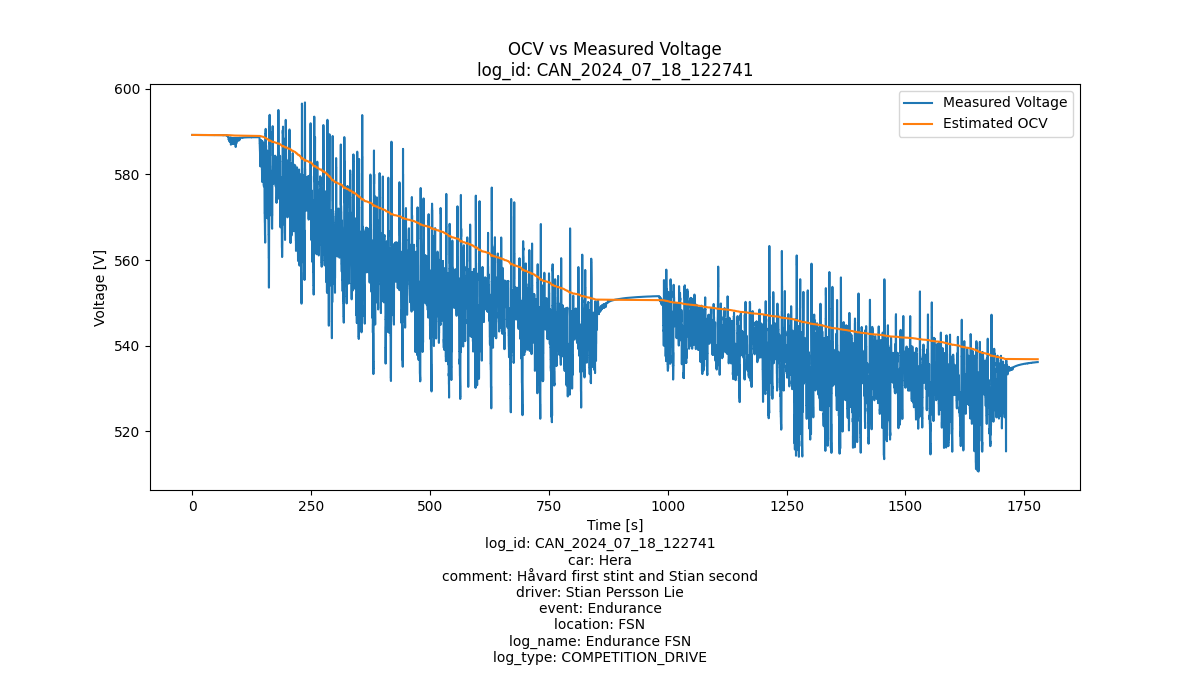

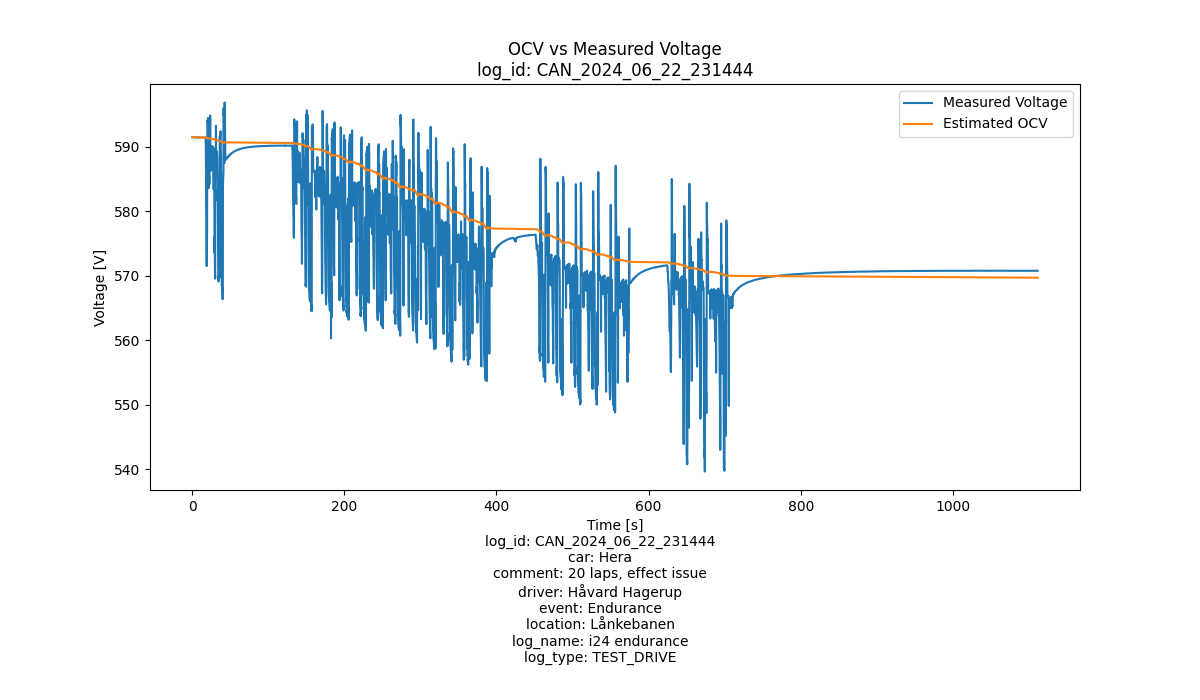

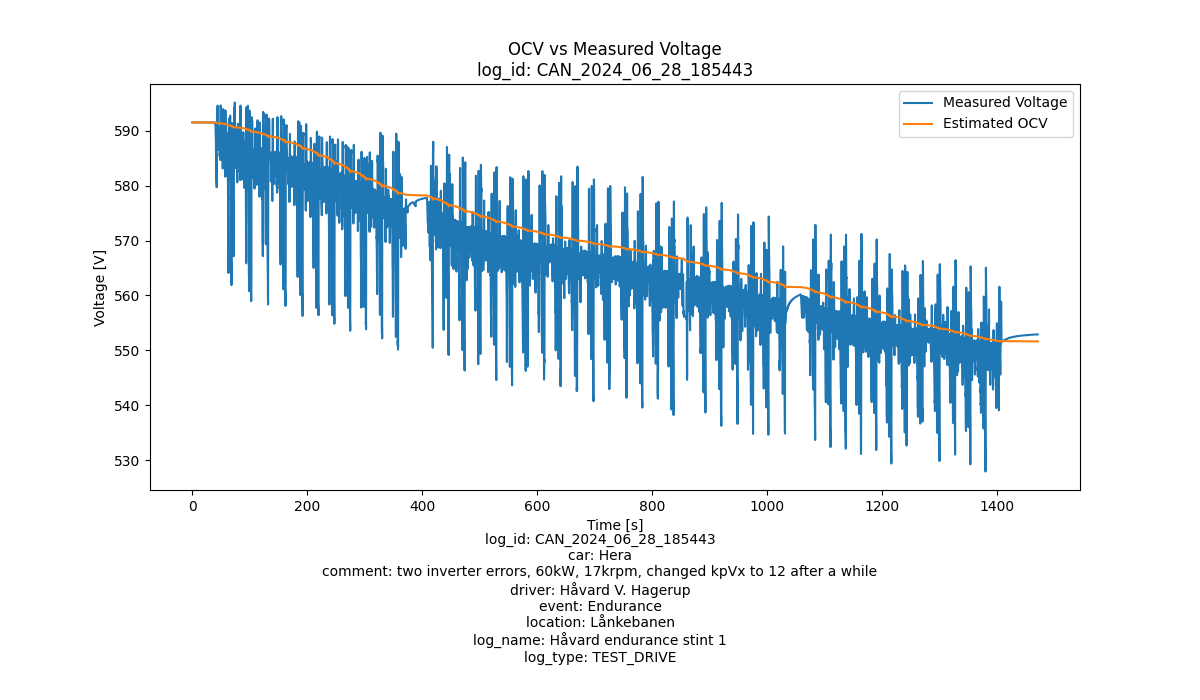

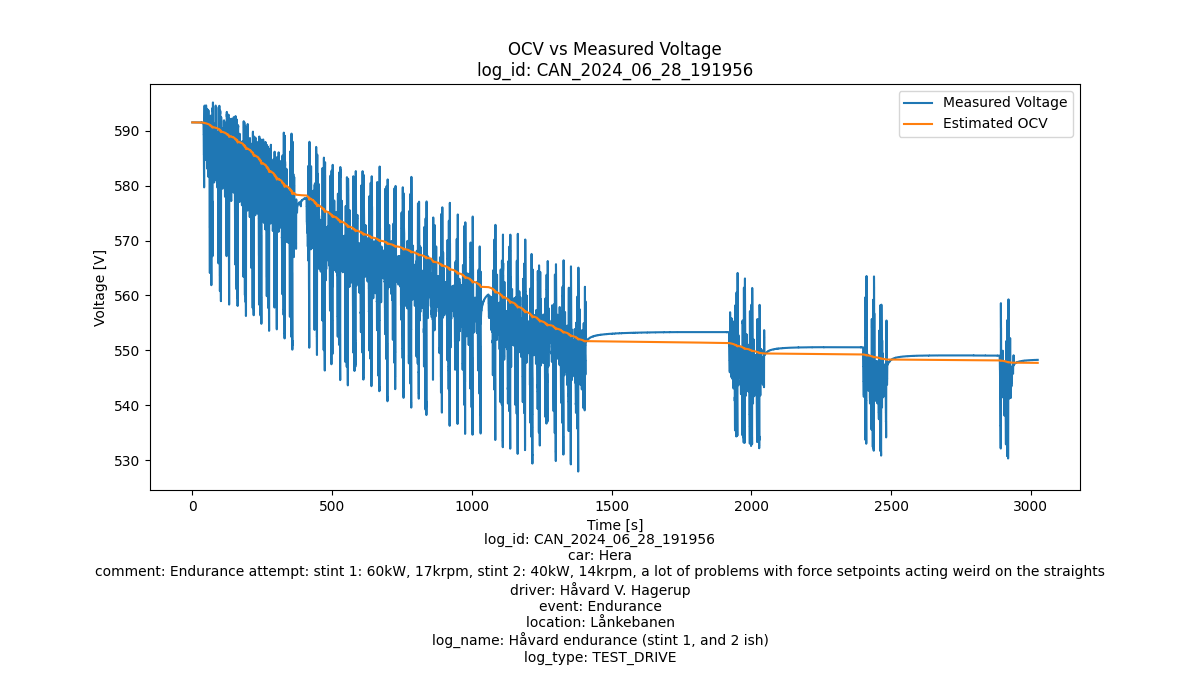

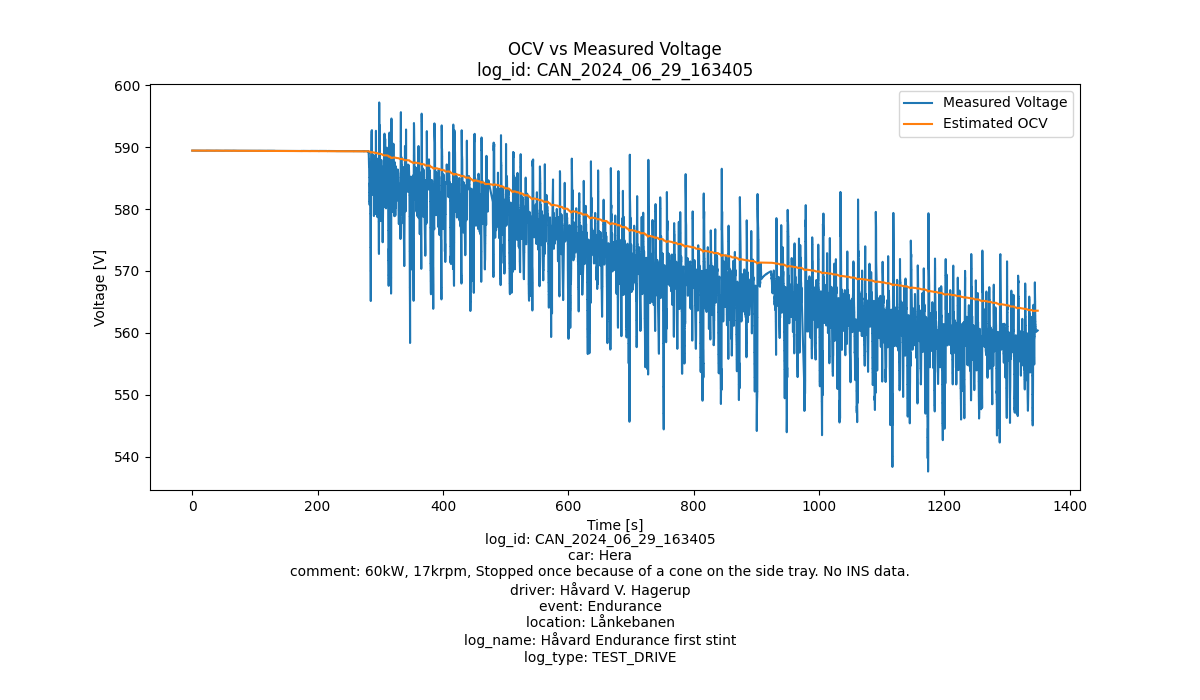

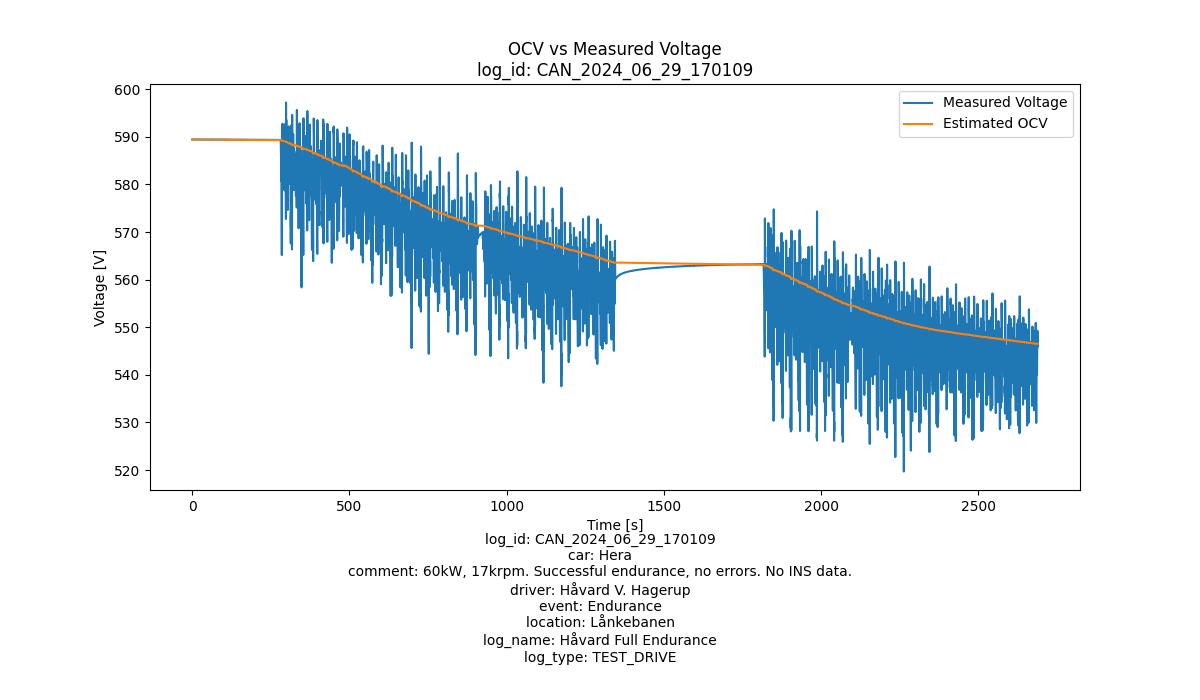

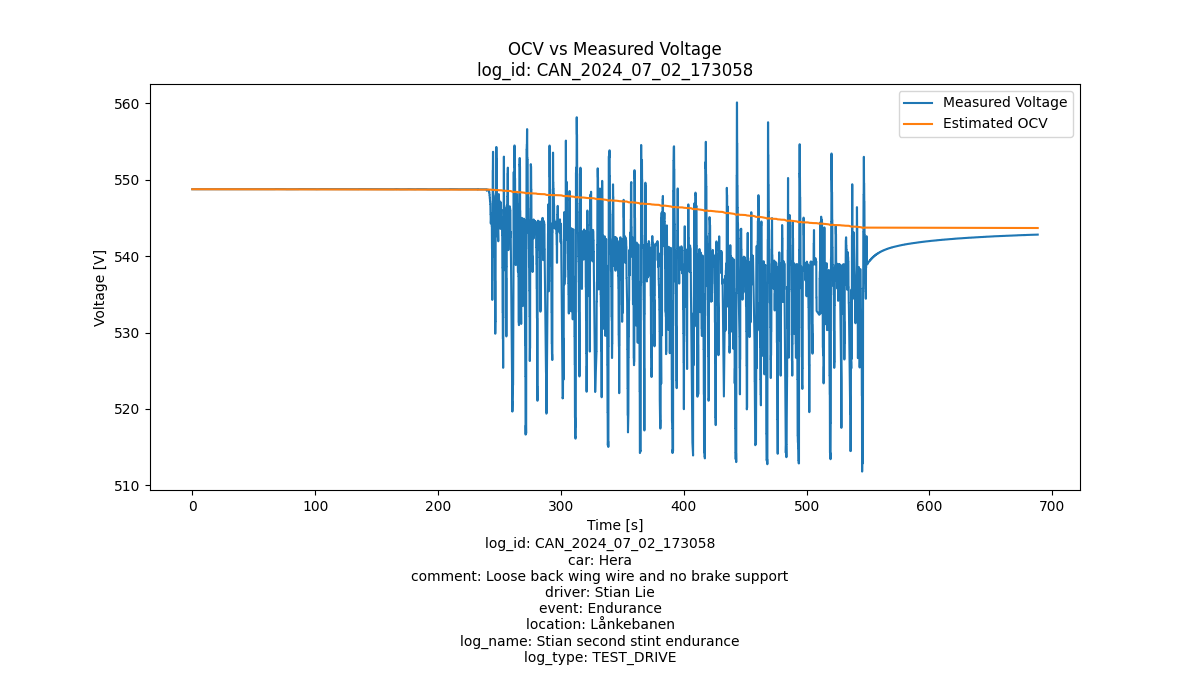

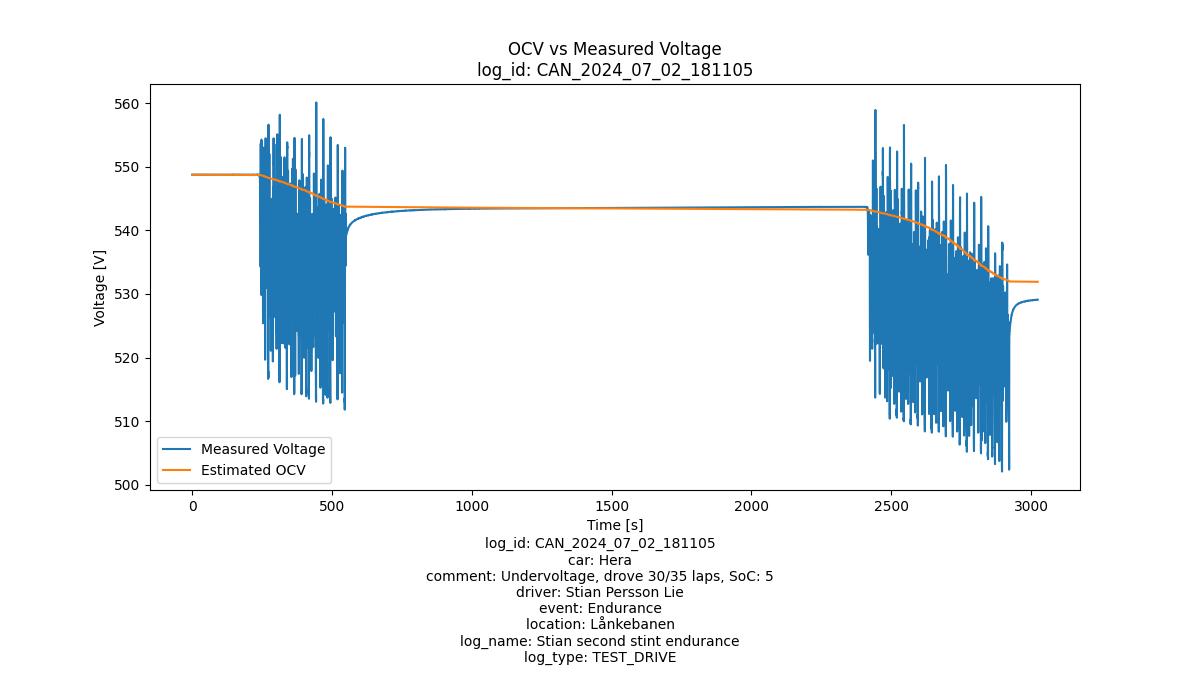

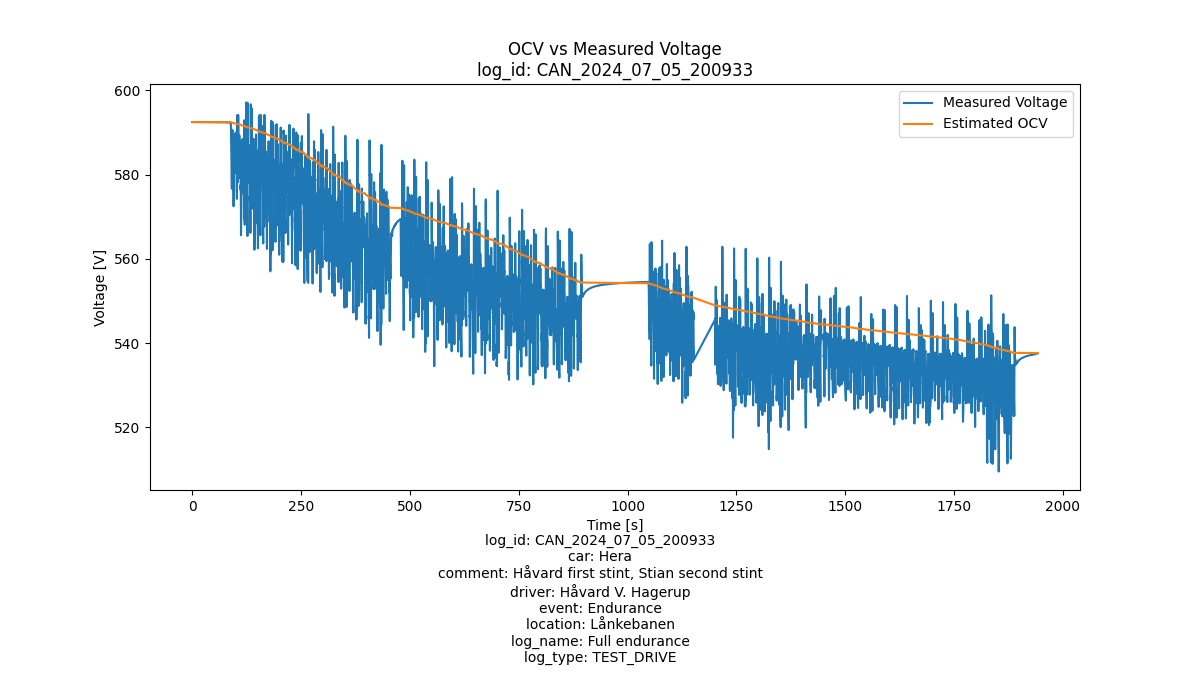

In [ ]:

# Plot all logs in separate figures with log info below each plot



for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    time = run['time']
    voltage = run['TSData_voltage_total_sum_of_cells']
    # Calculate OCV using your soc_estimation function
    ocv = soc_estimation(log_id)
    if ocv is None:
        print(f"Could not calculate OCV for log_id: {log_id}")
        continue

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(time, voltage, label='Measured Voltage')
    ax.plot(time, ocv, label='Estimated OCV')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Voltage [V]')
    ax.set_title(f'OCV vs Measured Voltage\nlog_id: {log_id}')
    ax.legend()

    # Prepare log info text
    log_info = (
        f"log_id: {log_id}\n"
        f"car: {logs[log_id]['car']}\n"
        f"comment: {logs[log_id]['comment']}\n"
        f"driver: {logs[log_id]['driver']}\n"
        f"event: {logs[log_id]['event']}\n"
        f"location: {logs[log_id]['location']}\n"
        f"log_name: {logs[log_id]['log_name']}\n"
        f"log_type: {logs[log_id]['log_type']}"
    )

    fig.subplots_adjust(bottom=0.3)
    fig.text(0.5, 0.05, log_info, ha='center', va='bottom', fontsize=10)

plt.show()

Efficiency

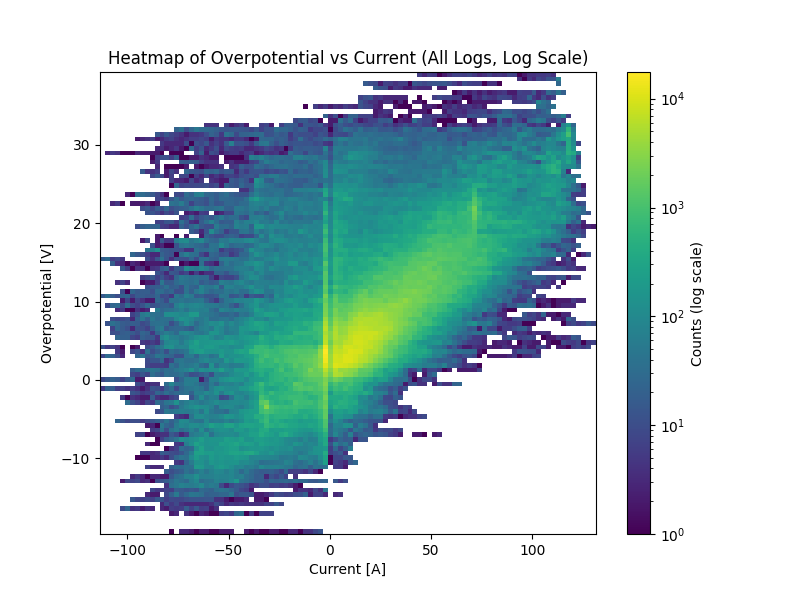

In [ ]:
# Prepare data for heatmap: concatenate all currents and overpotentials
import matplotlib.colors as mcolors

# Collect all currents and overpotentials from each log
all_currents = []
all_overpotentials = []

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    current_mask = abs(run['TSData_current']) > 1  # Assuming we only want positive currents
    current = run['TSData_current'][current_mask]
    overpot = overpotential(log_id)[current_mask]

    if overpot is not None:
        all_currents.append(current)
        all_overpotentials.append(overpot)

all_currents_concat = np.concatenate(all_currents)
all_overpotentials_concat = np.concatenate(all_overpotentials)

# Create 2D histogram (heatmap) in log scale
plt.figure(figsize=(8, 6))
hist, xedges, yedges, img = plt.hist2d(
    all_currents_concat, all_overpotentials_concat,
    bins=[100, 100],
    norm=mcolors.LogNorm(),
    cmap='viridis'
)

plt.colorbar(label='Counts (log scale)')
plt.xlabel('Current [A]')
plt.ylabel('Overpotential [V]')
plt.title('Heatmap of Overpotential vs Current (All Logs, Log Scale)')
# Fix: Define current_to_voltage as an alias for soc_estimation (used in overpotential)


plt.show()

Calculating efficiency for log_id: CAN_2024_06_22_231444
Calculating efficiency for log_id: CAN_2024_06_28_185443
Calculating efficiency for log_id: CAN_2024_06_28_191956
Calculating efficiency for log_id: CAN_2024_06_29_163405
Calculating efficiency for log_id: CAN_2024_06_29_170109
Calculating efficiency for log_id: CAN_2024_07_02_173058
Calculating efficiency for log_id: CAN_2024_07_02_181105
Calculating efficiency for log_id: CAN_2024_07_05_200933
Calculating efficiency for log_id: CAN_2024_07_18_122741
Average Efficiency: 0.9734 at 18.25 A


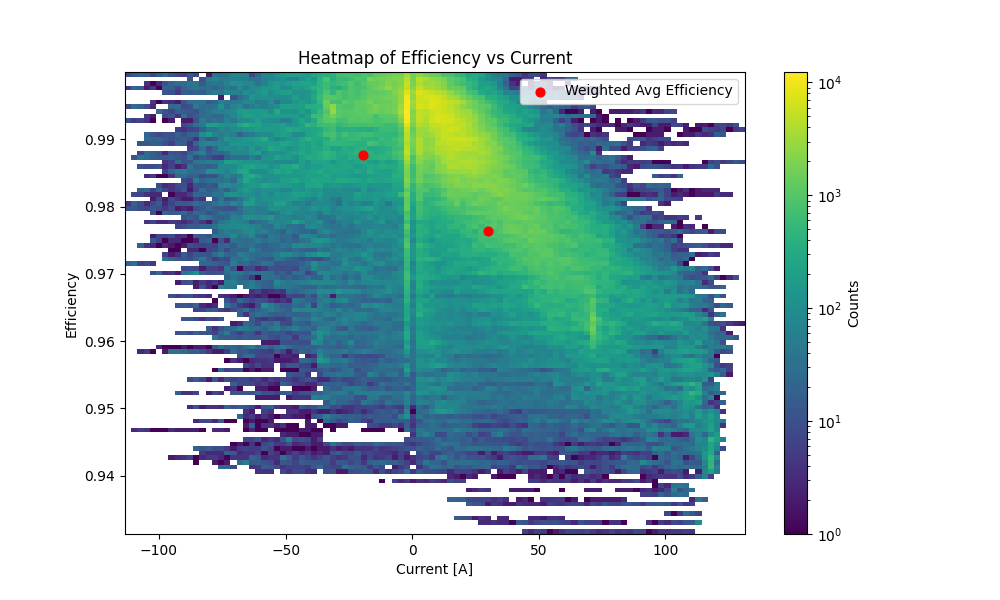

In [ ]:
from matplotlib import colors as mcolors



all_currents = []
all_efficiencies = []

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    efficiency = effciency(log_id)
    if efficiency is not None:
        mask_current = abs(current) > 1
        all_currents.append(current[mask_current])
        all_efficiencies.append(efficiency[mask_current])

all_currents_concat = np.concatenate(all_currents)
all_efficiencies_concat = np.concatenate(all_efficiencies)

plt.figure(figsize=(10, 6))
plt.hist2d(
    all_currents_concat, all_efficiencies_concat,
    bins=[100, 100],
    cmap='viridis',
    norm=mcolors.LogNorm(),
)
plt.colorbar(label='Counts')
plt.xlabel('Current [A]')
plt.ylabel('Efficiency')
plt.title('Heatmap of Efficiency vs Current')

mask_current_negative = all_currents_concat < -0
mask_current_positive = all_currents_concat > 0

average_efficincy_negative = (np.sum(abs(all_efficiencies_concat[mask_current_negative]*all_currents_concat[mask_current_negative]))/np.sum(abs(all_currents_concat[mask_current_negative])))
average_efficincy_positive = (np.sum(abs(all_efficiencies_concat[mask_current_positive]*all_currents_concat[mask_current_positive]))/np.sum(abs(all_currents_concat[mask_current_positive])))
average_efficincy = np.sum(all_efficiencies_concat*all_currents_concat)/np.sum(all_currents_concat)
average_current_negative = np.mean(all_currents_concat[mask_current_negative])
average_current_positive = np.mean(all_currents_concat[mask_current_positive])
average_current = np.mean(all_currents_concat)

print(f"Average Efficiency: {average_efficincy:.4f} at {average_current:.2f} A")

plt.scatter(
[average_current_negative, average_current_positive],
[average_efficincy_negative, average_efficincy_positive],
    color='red', s=40, marker='o', label='Weighted Avg Efficiency'
)
plt.legend()

plt.show()




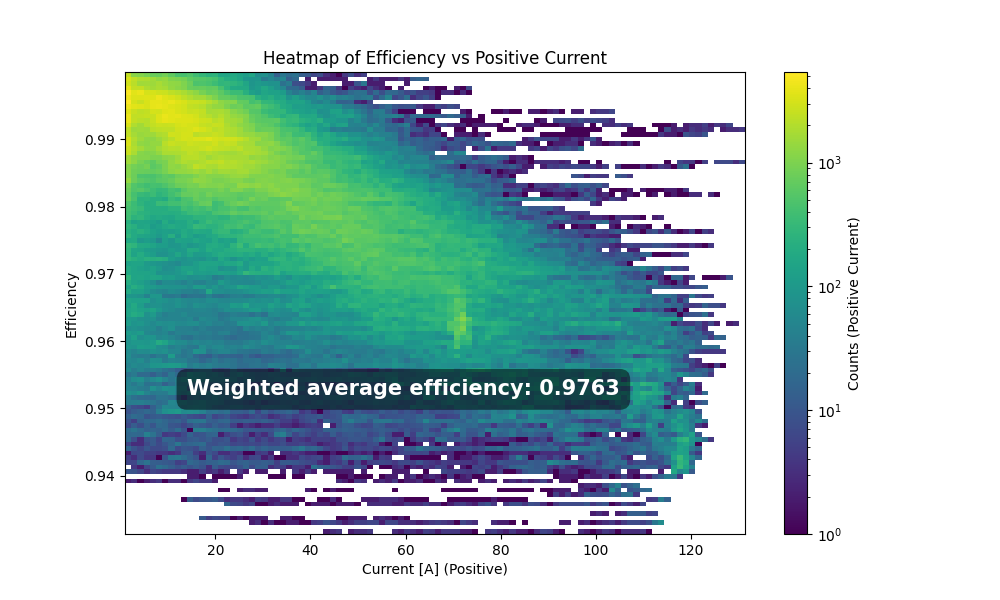

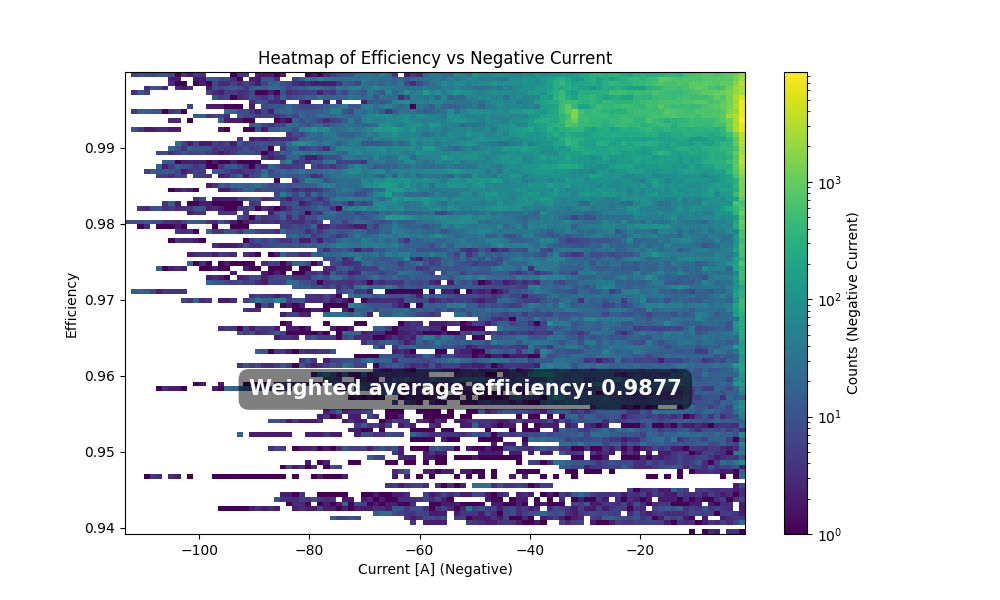

In [ ]:


plt.figure(figsize=(10, 6))
plt.hist2d(
    all_currents_concat[mask_current_negative], all_efficiencies_concat[mask_current_negative],
    bins=[100, 100],
    cmap='viridis',
    norm=mcolors.LogNorm(),
)
plt.colorbar(label='Counts (Negative Current)')
plt.xlabel('Current [A] (Negative)')
plt.ylabel('Efficiency')
plt.text(
    0.2,
    0.3,
    f"Weighted average efficiency: {average_efficincy_negative:.4f}",
    transform=plt.gca().transAxes,
    fontsize=15,
    fontdict={'color': 'white', 'weight': 'bold'},
    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5')
)
plt.title('Heatmap of Efficiency vs Negative Current')

plt.figure(figsize=(10, 6))
plt.hist2d(
    all_currents_concat[mask_current_positive], all_efficiencies_concat[mask_current_positive],
    bins=[100, 100],
    cmap='viridis',
    norm=mcolors.LogNorm(),
)
plt.colorbar(label='Counts (Positive Current)')
plt.xlabel('Current [A] (Positive)')
plt.ylabel('Efficiency')
plt.title('Heatmap of Efficiency vs Positive Current')
plt.text(
    0.1,
    0.3,
    f"Weighted average efficiency: {average_efficincy_positive:.4f}",
    transform=plt.gca().transAxes,
    fontsize=15,
    fontdict={'color': 'white', 'weight': 'bold'},
    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5')
)

plt.show()

Power loss vs current

In [ ]:
def power(log_id):
    """
    Calculate the power for a given log_id.
    """
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    voltage = run['TSData_voltage_total_sum_of_cells']
    
    if len(current) == 0 or len(voltage) == 0:
        print(f"No data available for log_id: {log_id}")
        return None
    
    power = current * voltage
    return power

def power_loss(log_id):
    # print(f"Calculating power loss for log_id: {log_id}")
    """
    Calculate the power loss for a given log_id.
    """
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    overpotential_int = overpotential(log_id)
    
    if len(current) == 0 or len(overpotential_int) == 0:
        print(f"No data available for log_id: {log_id}")
        return None
    
    power_loss = current * overpotential_int

    
    return power_loss



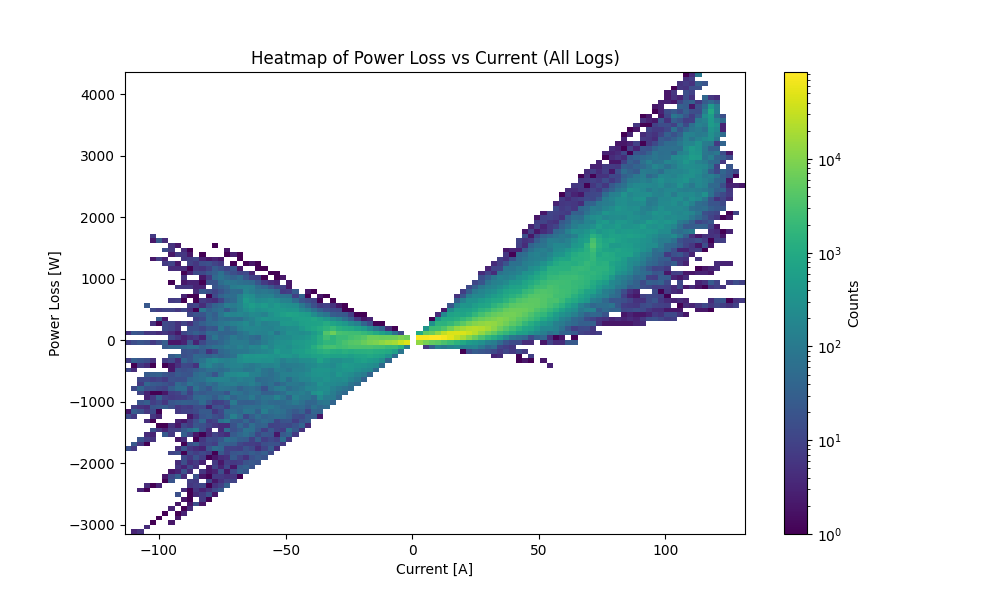

In [ ]:
# Prepare data for heatmap: concatenate all currents and power losses from each log
all_power_losses = []
all_currents = []

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    power_loss_arr = power_loss(log_id)
    if power_loss_arr is not None:
        mask_current = abs(current) > 2
        all_currents.append(current[mask_current])
        all_power_losses.append(power_loss_arr[mask_current])

all_power_losses_concat = np.concatenate(all_power_losses)
all_currents_concat = np.concatenate(all_currents)

plt.figure(figsize=(10, 6))
plt.hist2d(
    all_currents_concat, all_power_losses_concat,
    bins=[100, 100],
    cmap='viridis',
    norm=mcolors.LogNorm(),
)
plt.colorbar(label='Counts')
plt.xlabel('Current [A]')
plt.ylabel('Power Loss [W]')
plt.title('Heatmap of Power Loss vs Current (All Logs)')
plt.show()



Heat generation

Do the time integral of the overpotential to get the generated heat.

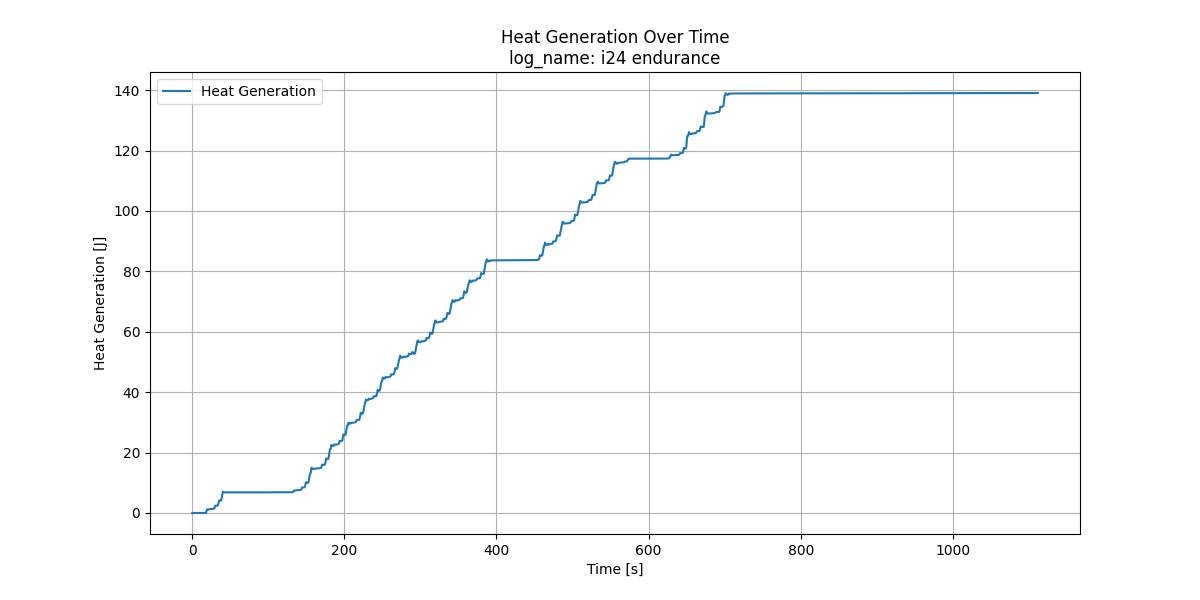

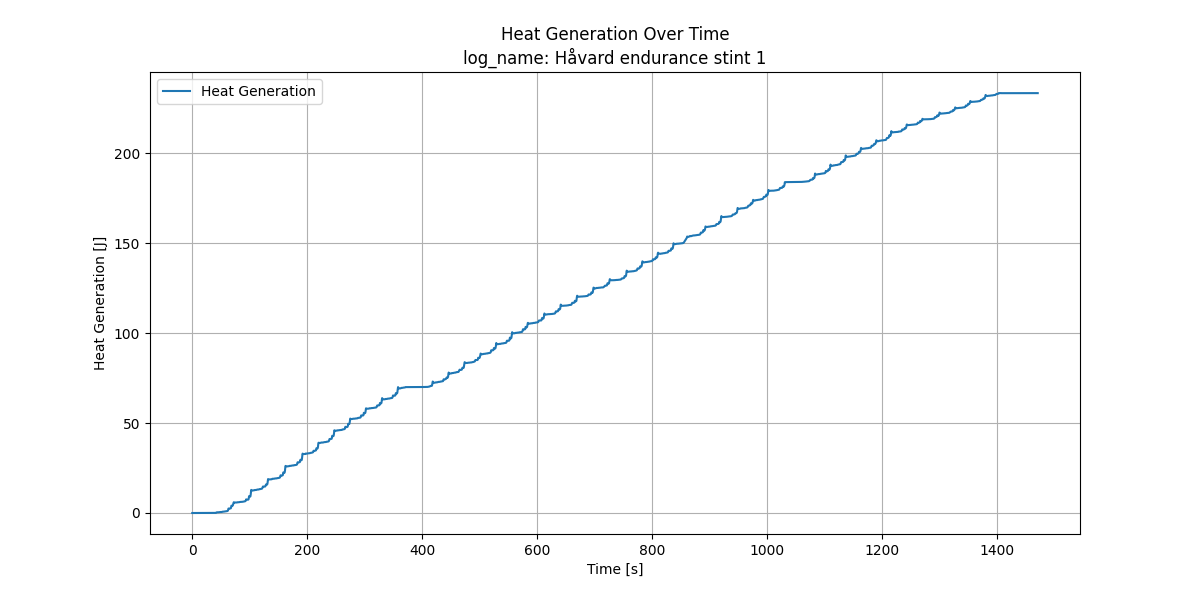

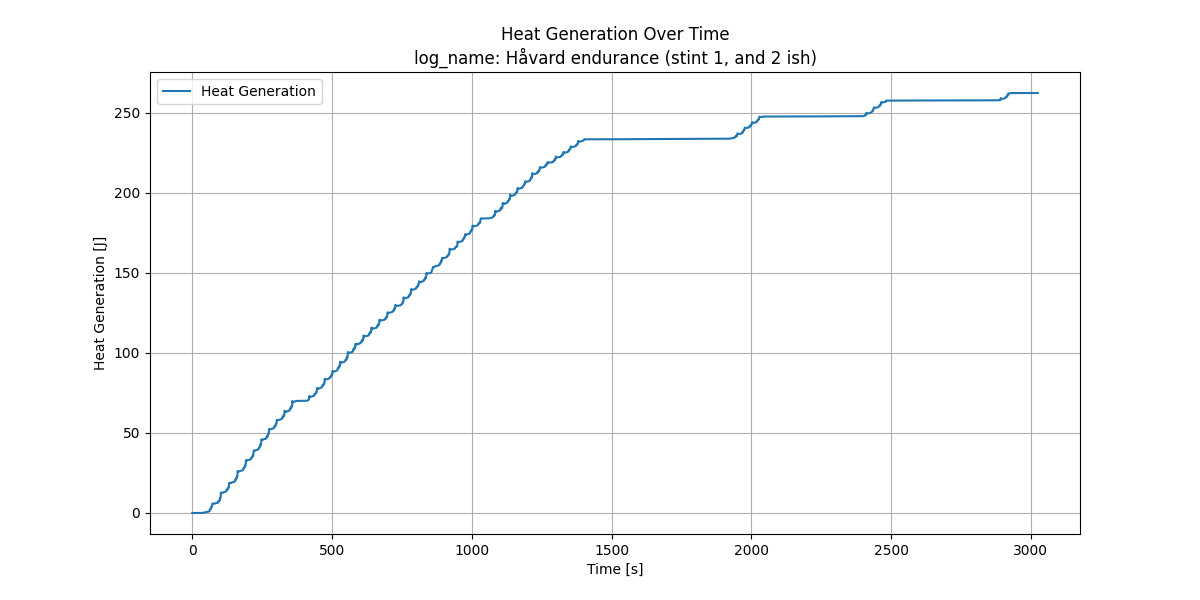

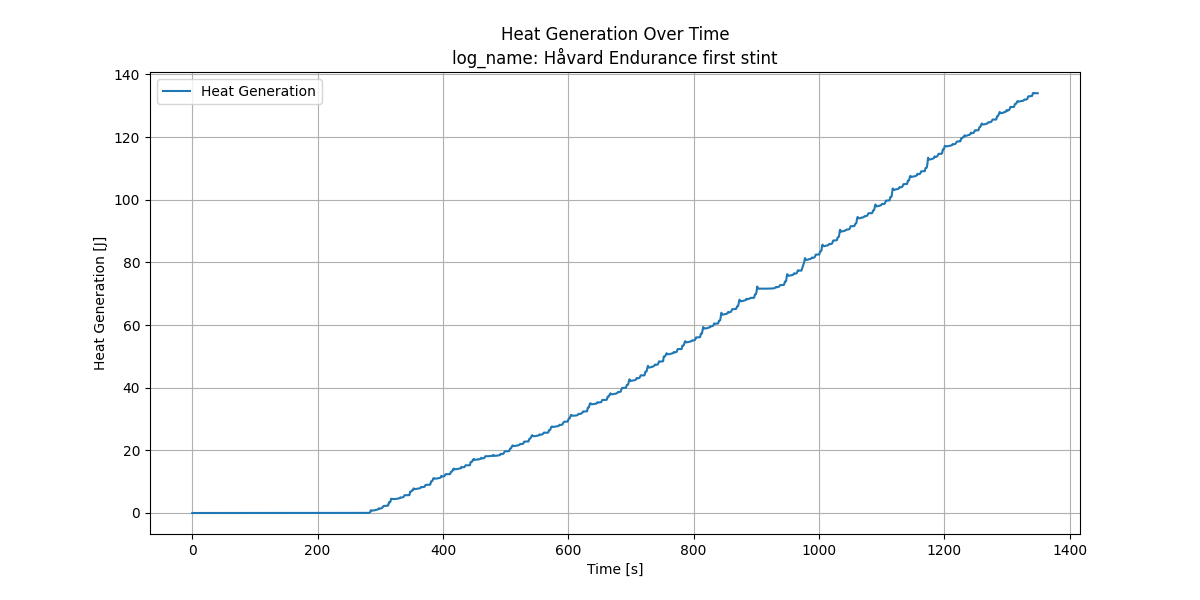

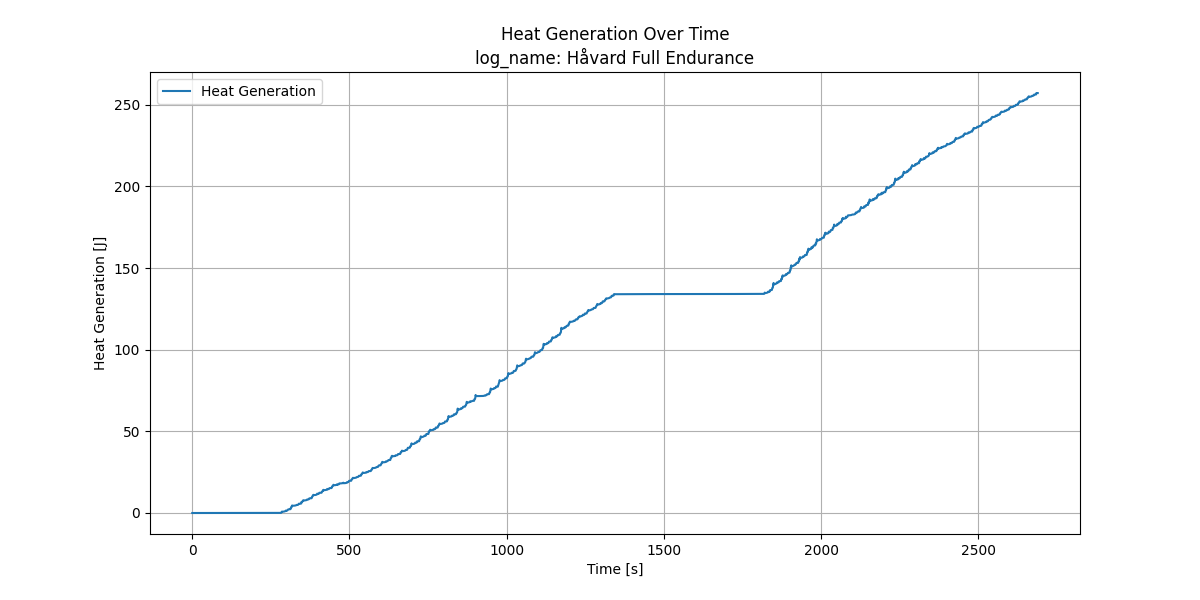

C:\Users\ogodh\AppData\Local\Temp\ipykernel_23160\2223877719.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


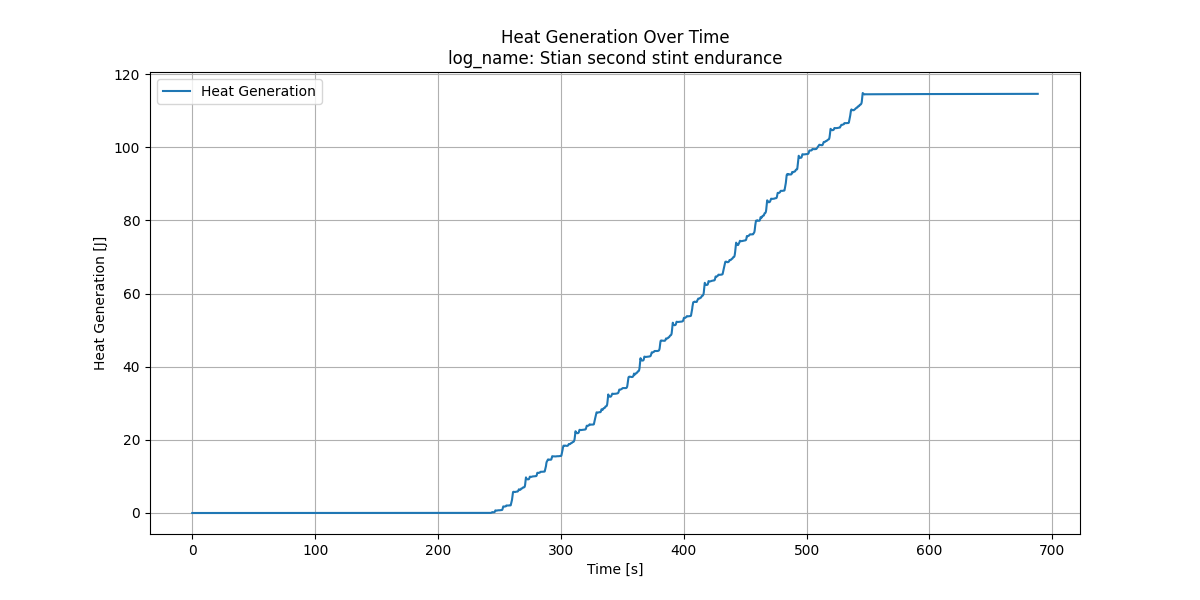

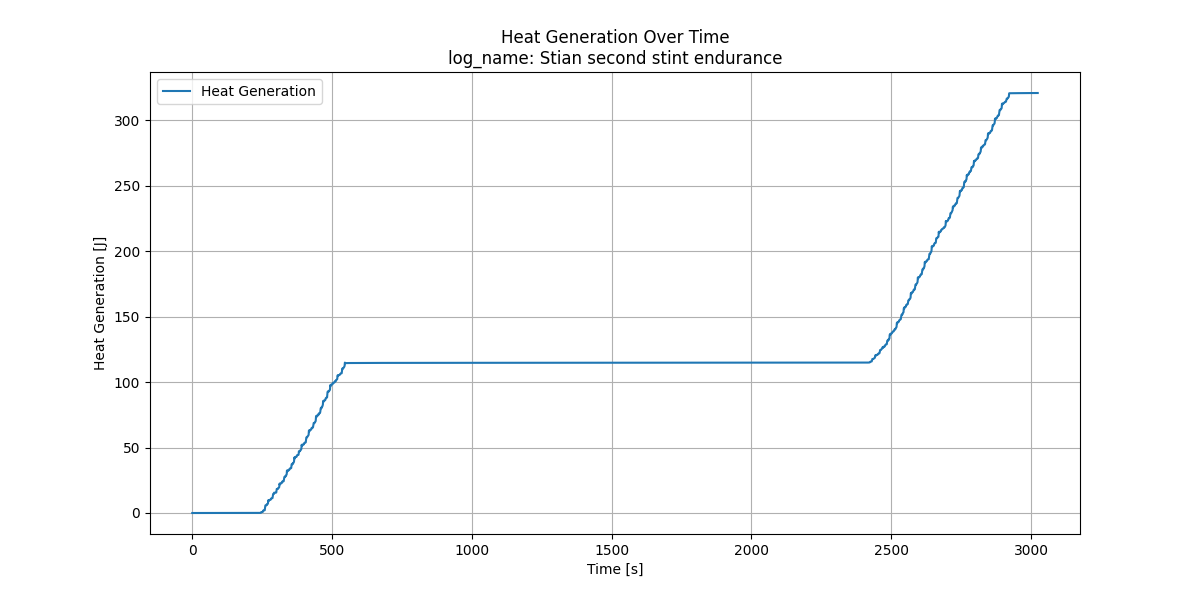

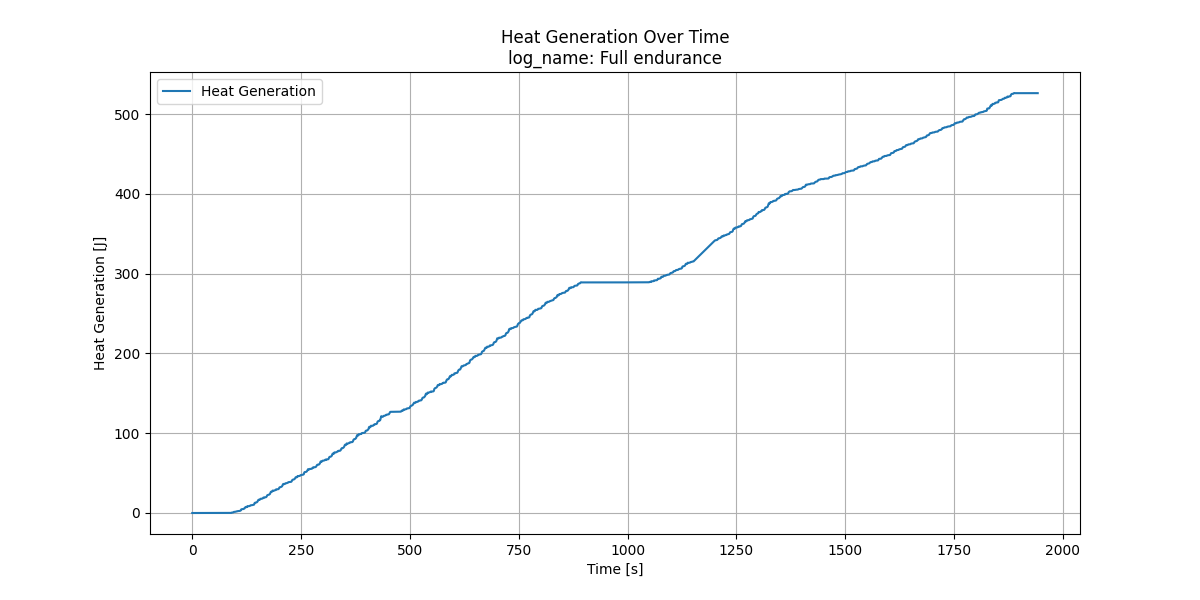

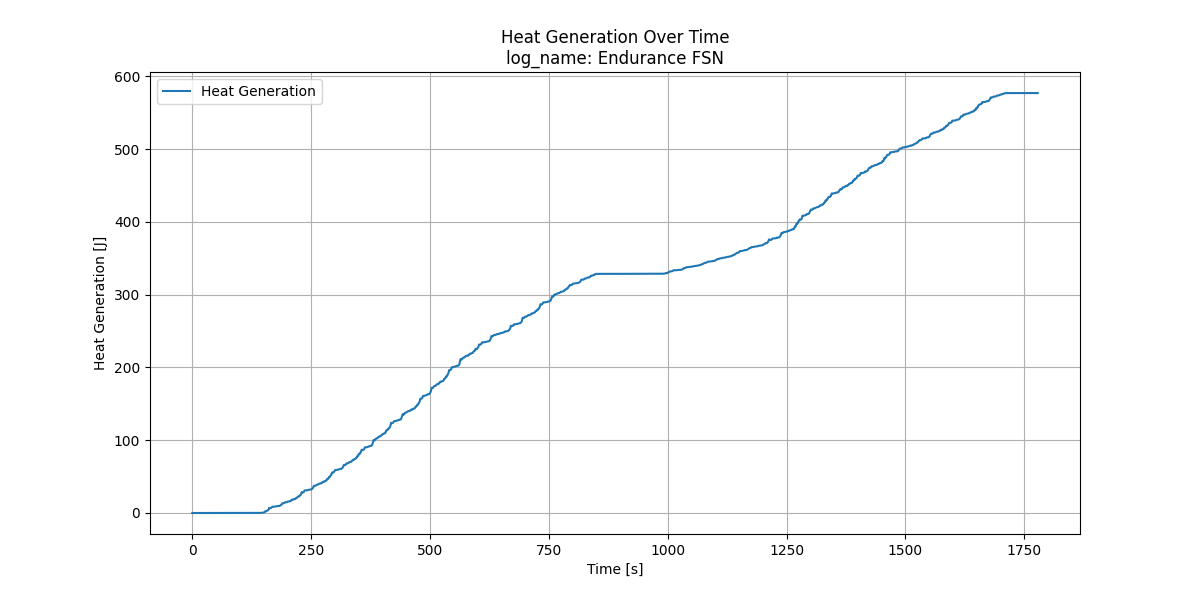

In [ ]:
heat_generation = []
for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    time = run['time']
    overpot = abs(overpotential(log_id))
    current = run['TSData_current']
    
    if overpot is None:
        print(f"Could not calculate overpotential for log_id: {log_id}")
        continue
    
    # Calculate heat generation as the integral of overpotential over time
    heat_gen = cumtrapz(overpot*current, x=time, initial=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, heat_gen/(3.6*10**6)*3600, label='Heat Generation')
    plt.xlabel('Time [s]')
    plt.ylabel('Heat Generation [J]')
    plt.title(f'Heat Generation Over Time\nlog_name: {logs[log_id]["log_name"]}')
    plt.legend()
    plt.grid()
    plt.show()

Temp modeling

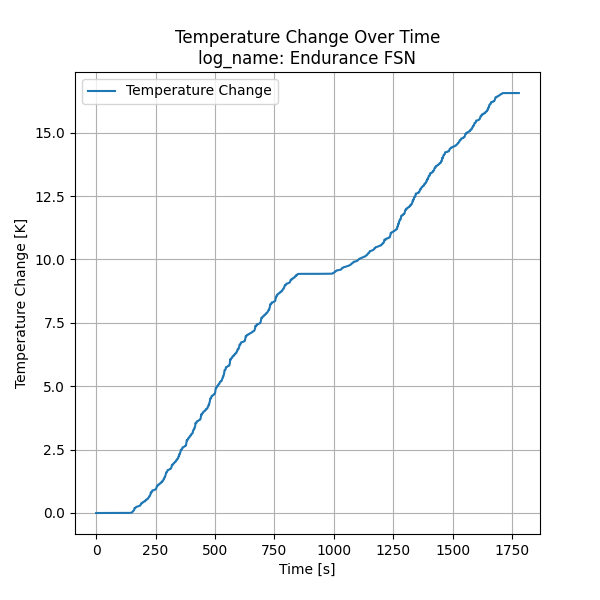

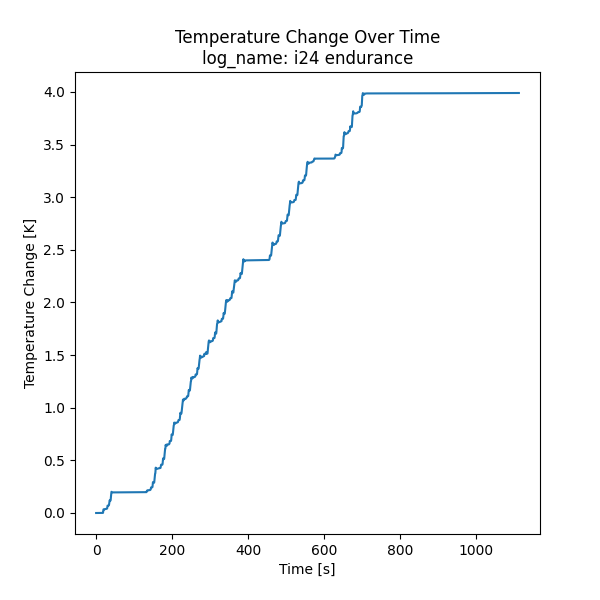

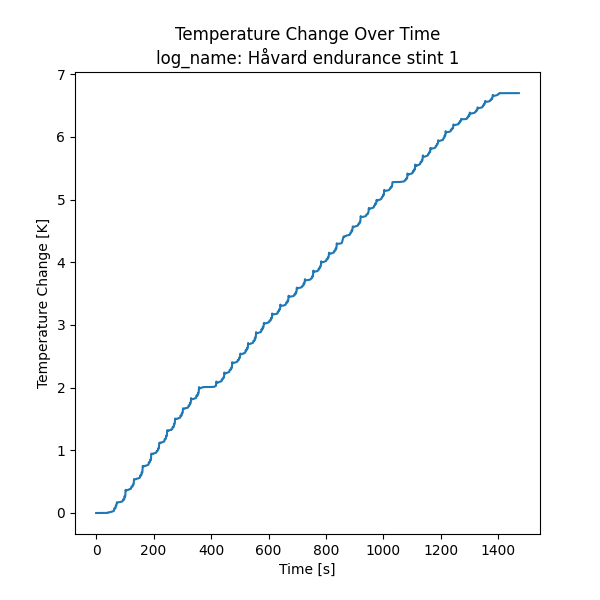

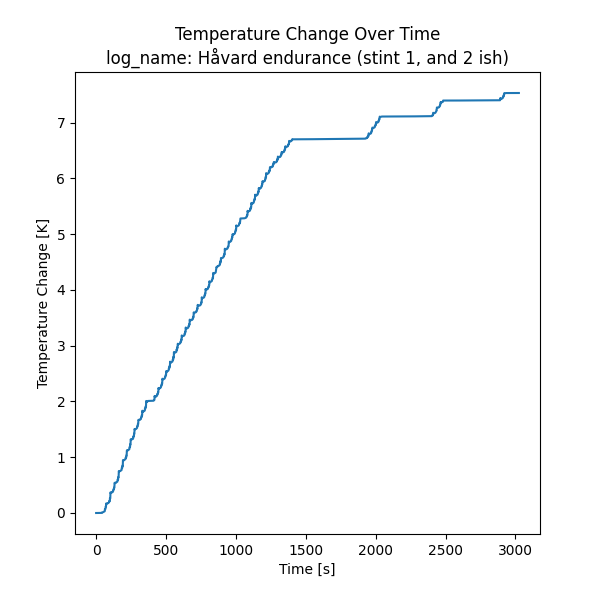

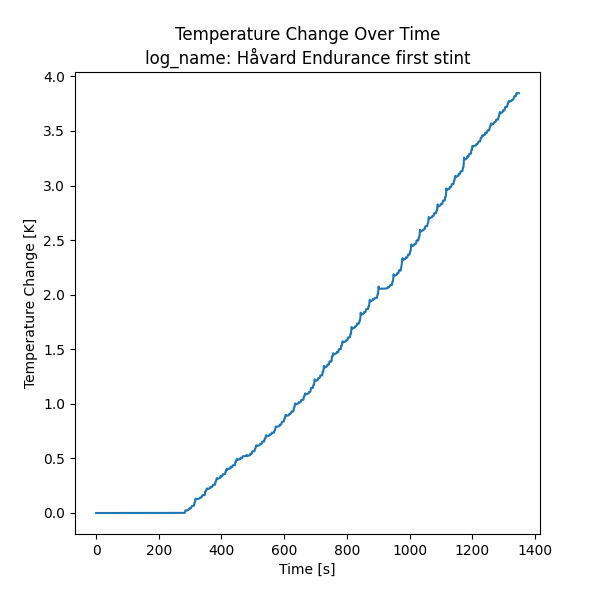

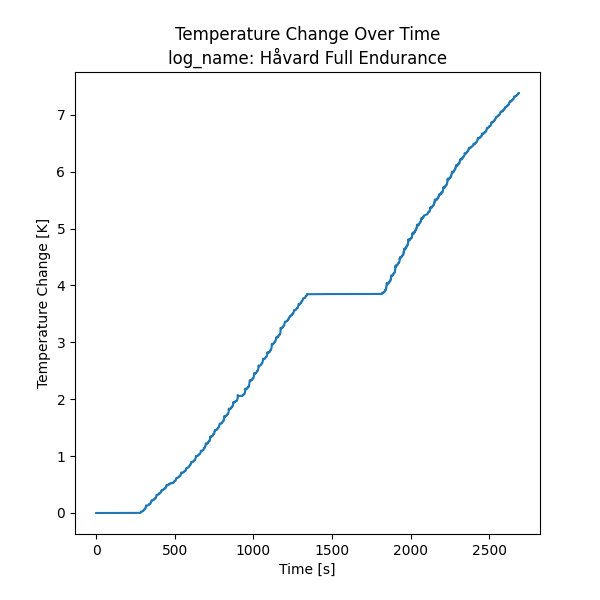

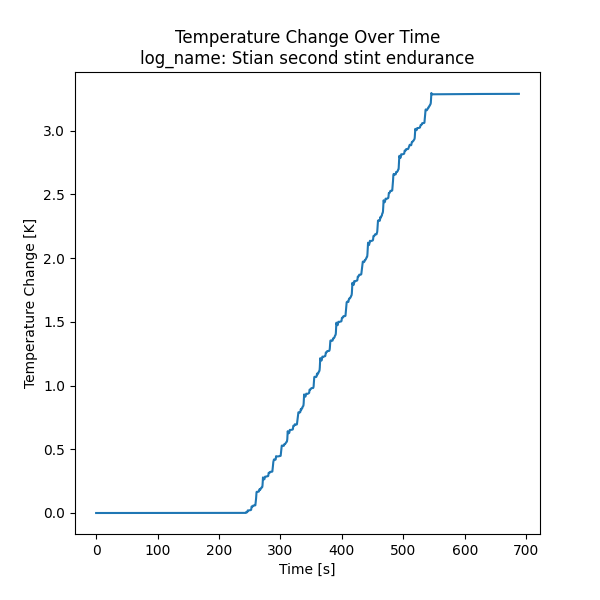

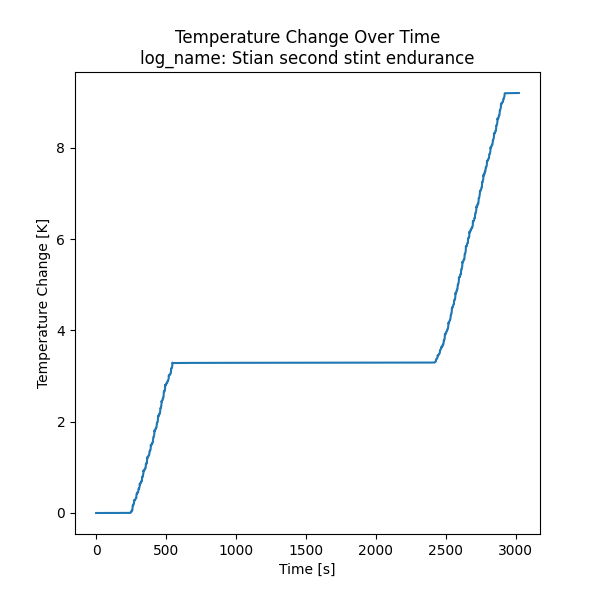

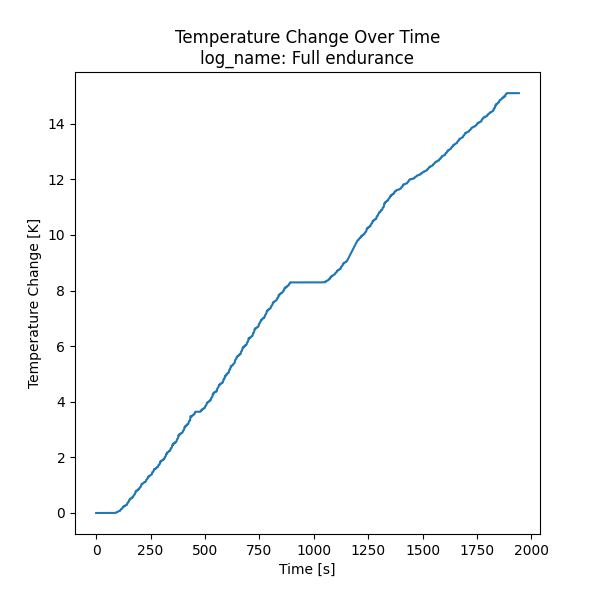

In [ ]:
Temp = []

heat_capacity = 1000 # J/(kg*K)  
m_cells = 0.121*144*2
heat_capacity = heat_capacity * m_cells   # J/(K)


for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    time = run['time']
    overpot = abs(overpotential(log_id))
    current = run['TSData_current']
    
    if overpot is None:
        print(f"Could not calculate overpotential for log_id: {log_id}")
        continue
    
    # Calculate heat generation as the integral of overpotential over time
    heat_gen = cumtrapz(overpot*current, x=time, initial=0)
    
    # Calculate temperature change
    temp_change = heat_gen / heat_capacity  # in K
    
    plt.figure(figsize=(6, 6))
    plt.plot(time, temp_change, label='Temperature Change')
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature Change [K]')
    plt.title(f'Temperature Change Over Time\nlog_name: {logs[log_id]["log_name"]}')
plt.legend()
plt.grid()
plt.show()


In [ ]:
temperatures_from_runs = {}
invalid_log_ids = []


for log_id in logs.keys():
    if not log_id in Log_id.__members__:
        print(f"Skipping invalid log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
        invalid_log_ids = invalid_log_ids if 'invalid_log_ids' in locals() else []
        invalid_log_ids.append(log_id)
        continue
    temperatures_from_runs[log_id] = Query().all_tags(getattr(Log_id, log_id)).channels(AMS.TSDATA.CURRENT).channels(AMS.TEMPERATURES).execute()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
# Remove invalid log IDs from the logs dictionary
if 'invalid_log_ids' in locals():
    for log_id in invalid_log_ids:
        del logs[log_id]
        print(f"Removed invalid log_id: {log_id}")

Processed log_id: CAN_2024_06_22_231444 Log_name: i24 endurance
Processed log_id: CAN_2024_06_28_185443 Log_name: Håvard endurance stint 1
Processed log_id: CAN_2024_06_28_191956 Log_name: Håvard endurance (stint 1, and 2 ish)
Processed log_id: CAN_2024_06_29_163405 Log_name: Håvard Endurance first stint
Processed log_id: CAN_2024_06_29_170109 Log_name: Håvard Full Endurance
Processed log_id: CAN_2024_07_02_173058 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_02_181105 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_05_200933 Log_name: Full endurance
Processed log_id: CAN_2024_07_18_122741 Log_name: Endurance FSN


In [ ]:
run_temp = {}
for log_id in logs.keys():
    if log_id not in temperatures_from_runs:
        print(f"No results for log_id: {log_id}")
        continue
    globals()[f"run_temp_{log_id}"] = temperatures_from_runs[log_id].to_numpy_arrays()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))

Processed log_id: CAN_2024_06_22_231444 Log_name: i24 endurance
Processed log_id: CAN_2024_06_28_185443 Log_name: Håvard endurance stint 1
Processed log_id: CAN_2024_06_28_191956 Log_name: Håvard endurance (stint 1, and 2 ish)
Processed log_id: CAN_2024_06_29_163405 Log_name: Håvard Endurance first stint
Processed log_id: CAN_2024_06_29_170109 Log_name: Håvard Full Endurance
Processed log_id: CAN_2024_07_02_173058 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_02_181105 Log_name: Stian second stint endurance
Processed log_id: CAN_2024_07_05_200933 Log_name: Full endurance


In [ ]:
print(temperatures_from_runs.keys())

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    temperatures = temperatures_from_runs[log_id]['Temperature_cell_001']
    time = run['time']
    overpot = abs(overpotential(log_id))
    current = run['TSData_current']
    
    if overpot is None:
        print(f"Could not calculate overpotential for log_id: {log_id}")
        continue
    
    # Calculate heat generation as the integral of overpotential over time
    heat_gen = cumtrapz(overpot*current, x=time, initial=0)
    
    # Calculate temperature change
    temp_change = heat_gen / heat_capacity  # in K
    
    plt.figure(figsize=(6, 6))
    plt.plot(time, temp_change, label='Temperature Change')
    plt.plot(time, temperatures, label='Measured Temperature', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature Change [K]')
    plt.title(f'Temperature Change Over Time\nlog_name: {logs[log_id]["log_name"]}')
plt.legend()
plt.grid()
plt.show()

NameError: name 'temperatures_from_runs' is not defined

In [ ]:

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    time = run['time']
    overpot = abs(overpotential(log_id))
    current = run['TSData_current']
    if overpot is None:
        print(f"Could not calculate overpotential for log_id: {log_id}")
        continue

    # Calculate heat generation as the integral of overpotential over time
    heat_gen = cumtrapz(overpot*current, x=time, initial=0)

    # Calculate temperature change
    temp_change = heat_gen / heat_capacity  # in K

    